In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

# Data After Sanderd Cleaning

In [2]:
data=pd.read_excel(r"E:\BDU Data _ 221109_Ahamed Aboghaly.xlsx")

## Exploring Data

In [3]:
data.head()

,Opportunity ID,EGEC Number,Opportunity type,Opportunity Name,Business Line,Client Name,Project Owner,Account Manager,Client Segment,EGEC Company,...,QAR,EUR,USD,Fees in USD,Opportunity Manager,Director,Opportunity Status,Submission Date,Project Type,Date Awarded/Lost
0,822-2021,99-EG-21-822-PR,Proposal,DS.إعداد الدراسات التصميمية ومستندات الطرح لمش...,Water & Enviornment,الجهاز التنفيذى لمياه الشرب والصرف الصحى,الجهاز التنفيذى لمياه الشرب والصرف الصحى,Ehab Rashed,Government,Egypt,...,NaN,NaN,NaN,19240.636224,Sally Latif,Ehab Rashed,Awarded,2021-10-11,Water & wastewater,2022-01-01
1,12,99-EG-22-012-PR,Proposal,DS. كوبرى مزلقان بنى مزار,Building & facilities,شركة النيل العامة لإنشاء الطرق,شركة النيل العامة لإنشاء الطرق,Hisham hafez,Government,Egypt,...,NaN,NaN,NaN,5364.032837,Hisham hafez,Hisham hafez,Awarded,2022-01-02,Geotechnical,2022-01-02
2,10,99-EG-22-010-PR,Proposal,DS. Detail Design of Infrastructure & Hardscap...,Building & facilities,Emaar,Emaar,Hesham Elshazly,Other Business,Egypt,...,NaN,NaN,NaN,5130.836326,Mohamed Anwar,Nasser Zaki,Awarded,2022-01-10,Sustations & transmission,2022-01-10
3,933-2021,99-EG-21-933-PR,Proposal,DS. Structural assessment for the production h...,Building & facilities,Unilever,Unilever,Eslam Mostafa,Other Business,Egypt,...,NaN,NaN,NaN,7798.871216,Mohamed Reda,Nasser Zaki,Awarded,2021-12-01,NaN,2022-01-12
4,1,99-EG-22-001-PR,Proposal,DS. المناقصة المحدوده الخاصة بطلب خدمات استشار...,Building & facilities,VACSERA,VACSERA,Islam shawky,Government,Egypt,...,NaN,NaN,NaN,NaN,Mariem Wagih,Nasser Zaki,Awarded,2022-01-03,NaN,2022-01-26


In [4]:
data.columns

Index(['Opportunity ID', 'EGEC Number', 'Opportunity type', 'Opportunity Name',
       'Business Line', 'Client Name', 'Project Owner', 'Account Manager',
       'Client Segment', 'EGEC Company', 'Service', 'Country',
       'Project Location', 'Deadline', 'EGP', 'SAR', 'AED', 'QAR', 'EUR',
       'USD', 'Fees in USD', 'Opportunity Manager', 'Director',
       'Opportunity Status', 'Submission Date', 'Project Type',
       'Date Awarded/Lost'],
      dtype='object')

In [5]:
data.shape

(543, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Opportunity ID       543 non-null    object        
 1   EGEC Number          534 non-null    object        
 2   Opportunity type     543 non-null    object        
 3   Opportunity Name     543 non-null    object        
 4   Business Line        543 non-null    object        
 5   Client Name          539 non-null    object        
 6   Project Owner        395 non-null    object        
 7   Account Manager      533 non-null    object        
 8   Client Segment       528 non-null    object        
 9   EGEC Company         538 non-null    object        
 10  Service              542 non-null    object        
 11  Country              542 non-null    object        
 12  Project Location     538 non-null    object        
 13  Deadline             543 non-null  

In [7]:
null_data=data.isnull().sum()
null_data[null_data>0]

EGEC Number            9
Client Name            4
Project Owner        148
Account Manager       10
Client Segment        15
EGEC Company           5
Service                1
Country                1
Project Location       5
EGP                  183
SAR                  346
AED                  448
QAR                  450
EUR                  442
USD                  443
Fees in USD           80
Project Type         296
Date Awarded/Lost    160
dtype: int64

<AxesSubplot:>

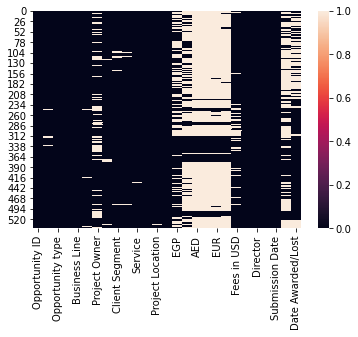

In [8]:
sns.heatmap(data.isnull())

## Cleaning Data 

In [9]:
data=data.drop(['Client Name','SAR','EGP','QAR',
                'EGEC Number','Opportunity Name','Opportunity ID','Project Owner',
                'EUR','USD','AED','Project Type','Submission Date',
                'Account Manager','Country','Opportunity Manager','Director',
                'Country','EGEC Company'],axis=1)

### pending data deleted (33 record)

In [10]:
dnull=data['Opportunity Status'].value_counts()
dnull

Awarded                264
Lost Financial         211
Canceled by Client      40
Canceled by EGEC        28
Name: Opportunity Status, dtype: int64

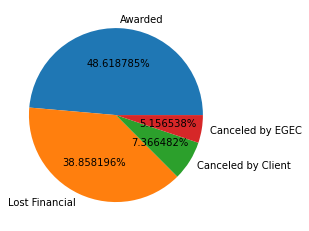

In [11]:
labels=['Awarded','Lost Financial','Canceled by Client','Canceled by EGEC']
plt.pie(dnull,labels=labels,autopct='%2f%%')
plt.show()

In [33]:
dd=data.isnull().sum()
dd[dd>0]

Client Segment        15
Service                1
Project Location       5
Fees in USD           80
Date Awarded/Lost    160
dtype: int64

In [13]:
df=data.dropna()

In [14]:
df=df.drop(['Date Awarded/Lost','Deadline'],axis=1)

### Converting Data Type

In [15]:
df_obj=df.select_dtypes(include='object')
df_non_obj=df.select_dtypes(exclude='object')

In [16]:
la=LabelEncoder()

In [17]:
for i in range(0,df_obj.shape[1]):
    df_obj.iloc[:,i]=la.fit_transform(df_obj.iloc[:,i])

C:\Users\INFEG\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\INFEG\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [18]:
ndf=pd.concat([df_obj,df_non_obj],axis=1)

## Data Analysis

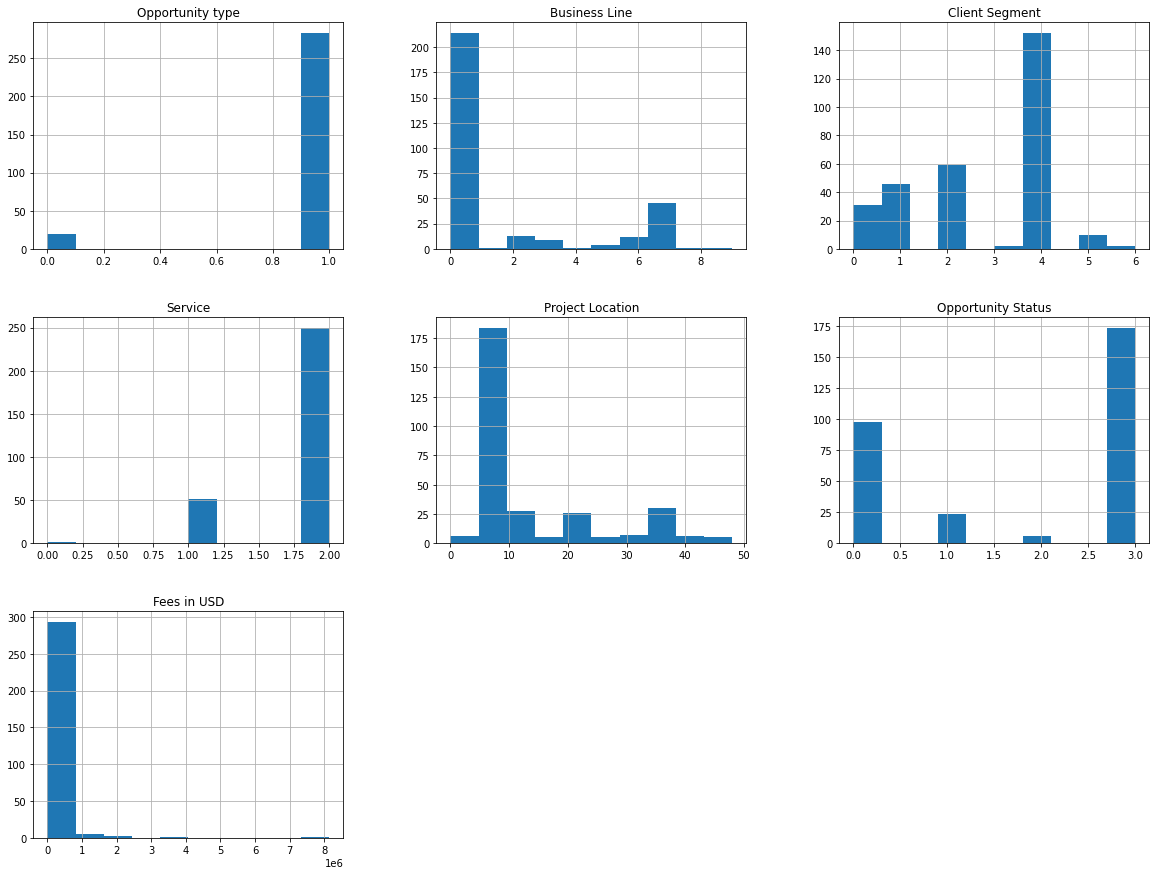

In [19]:
ndf.hist(figsize=(20,15))
plt.show()

<AxesSubplot:>

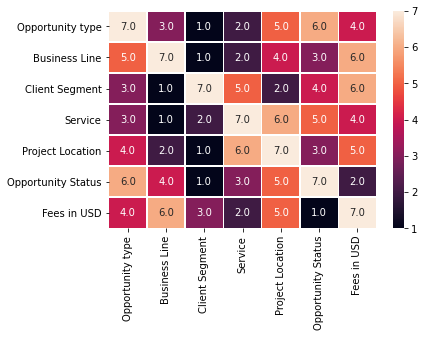

In [20]:
cor=ndf.corr()
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt=".1f",linewidth=.5)

## Creating ML Model

In [21]:
x=ndf.drop(['Opportunity Status'],axis=1)
y=ndf['Opportunity Status']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=21)

In [23]:
scalar=MinMaxScaler()
x_tr_scal=scalar.fit_transform(x_train)
x_ts_scal=scalar.fit_transform(x_test)

In [24]:
def ml_learn(model):
    model.fit(x_tr_scal,y_train)
    pre=model.predict(x_ts_scal)
    print('model train score is :',model.score(x_tr_scal,y_train))
    print('model test score is :',model.score(x_ts_scal,y_test))
    print('Accuracy_Model : ',accuracy_score(pre,y_test))
   

In [25]:
model1=LogisticRegression()
ml_learn(model1)

model train score is : 0.6018957345971564
model test score is : 0.6373626373626373
Accuracy_Model :  0.6373626373626373


In [26]:
model2=DecisionTreeClassifier()
ml_learn(model2)

model train score is : 0.966824644549763
model test score is : 0.45054945054945056
Accuracy_Model :  0.45054945054945056


In [27]:
model3=RandomForestClassifier() # ----> best Algorithm 
ml_learn(model3)

model train score is : 0.966824644549763
model test score is : 0.6813186813186813
Accuracy_Model :  0.6813186813186813


In [28]:
model4=KNeighborsClassifier()
ml_learn(model4)

model train score is : 0.6919431279620853
model test score is : 0.6043956043956044
Accuracy_Model :  0.6043956043956044


In [29]:
model5=GradientBoostingClassifier()
ml_learn(model5)

model train score is : 0.957345971563981
model test score is : 0.6043956043956044
Accuracy_Model :  0.6043956043956044


In [30]:
model6=SVC()
ml_learn(model6)

model train score is : 0.6018957345971564
model test score is : 0.6373626373626373
Accuracy_Model :  0.6373626373626373


In [31]:
model7=GaussianNB()
ml_learn(model7)

model train score is : 0.11374407582938388
model test score is : 0.0989010989010989
Accuracy_Model :  0.0989010989010989
